# Questão 3

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Realize a regressão linear para o seguinte problema: Peso corporal dos cordeiros tem relação com o peso do Rendimento em carne no animal, aos 4 meses de idade, de 10 cordeiros da raça Hampshire Down renderam respectivamente:

In [191]:
tabela = np.array([
    [49, 24],
    [65, 40],
    [45, 25],
    [40, 23.5],
    [55, 33.5],
    [45,22],
    [44,22.5],
    [47, 23.5],
    [50, 25],
    [56,35]
])
df = pd.DataFrame(tabela, columns = ['Peso', 'Rend. Carcaça'])

In [192]:
df

,Peso,Rend. Carcaça
0,49.0,24.0
1,65.0,40.0
2,45.0,25.0
3,40.0,23.5
4,55.0,33.5
5,45.0,22.0
6,44.0,22.5
7,47.0,23.5
8,50.0,25.0
9,56.0,35.0


## a) Esboce o gráfico dos dados e tente chutar se a relação é crescente ou decrescente. Os dados estão formando aproximadamente uma reta?

In [193]:
x = np.array(df.loc[:, 'Peso'])
y = np.array(df.loc[:, 'Rend. Carcaça'])

<AxesSubplot: >

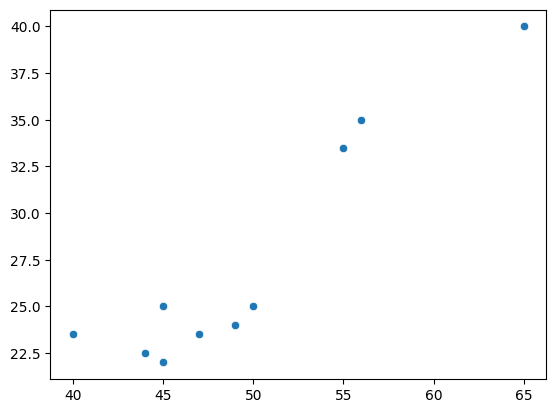

In [194]:
sns.scatterplot(x=x, y=y)

Percebe-se que mesmo um pouco distantes, fica clara a relação crescente. Além disto, os dados não formam claramente uma reta, pois se dispersam.

Sabemos que para utilizar os metodos iterativos de resolucao de sistemas, ele deve ser quadrado, e para ter resposta, todos os dados devem estar alinhados perfeitamente em uma reta, o que nao acontece neste caso, entao, utilizaremos regressao linear.
A regressão linear tem como objetivo desenvolver uma função linear que passe o mais próximo possível dos pontos, sem necessariamente interpolá-los.

Logo, a regressão linear busca uma resposta da seguinte forma: $f(x)=ax+b$ para os pontos dados.

Pela definição do livro que tomamos como base, nos livrando dos rigores da demonstração, segue o cálculo que deve ser feito para que, utilizando as formas matriciais, cheguemos ao resultado do coeficiente a e b:

# $$a = (V^{T}V)^{-1}V^{T}y$$


Onde $V$ é a matriz dos coeficientes de $a$ e $b$, e $y$ é a matriz dos resultados.

A partir disso, será desenvolvida a função mais geral da regressão linear:

In [195]:
def regressao_linear(arr_coeficientes, arr_resultados):
    a = arr_coeficientes
    b = arr_resultados
    
    result = np.matmul(np.matmul(np.linalg.inv((np.matmul(a.T,a))),a.T), b)
    return result

In [196]:
coeficientes = []
for i in range(10):
    coeficientes.append([1,x[i]])

coeficientes = np.array(coeficientes)

resultado = np.copy(y).reshape(10,1)

cof = regressao_linear(coeficientes, resultado)


In [197]:
cof

array([[-12.61865112],
       [  0.80682764]])

## Percebemos, então, que pela regressão linear, o coeficiente $a=0.8068$ e o coeficiente $b=-12.6186$

Agora, fazendo o gráfico:

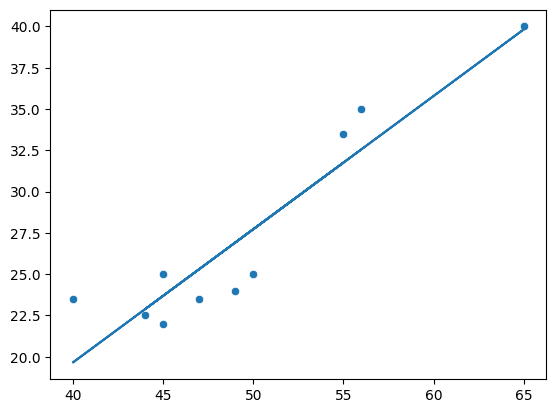

In [198]:
sns.scatterplot(x=x,y=y)

line = cof[0][0] + cof[1][0] * x

plt.plot(x,line)

# C) Calcule o coeficiente de $R^{2}$ (coeficiente de correlação)

O coeficiente de correlação é dado pela seguinte fórmula:
$$
r = \frac{\sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}.\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}}
$$

Então, precisamos calcular a média dos vetores informados, e após isso, poderemos calcular tranquilamenteo coficiente.

In [309]:
def coeficiente_correlacao(x,y):
    m_x = np.copy(np.mean(x))
    m_y = np.copy(np.mean(y))
    
    upper = 0
    
    for i,j in zip(x,y):
        upper += (i-m_x)*(j-m_y)
        
    b_x_s = 0
    for i in x:
        b_x_s += (i-m_x)**2
        
    b_y_s = 0
    for i in y:
        b_y_s += (i-m_y)**2
    
    return upper/math.sqrt(b_x_s*b_y_s)


In [310]:
coeficiente_correlacao(x,y)

0.9315150540811271

## O coeficiente de correlação calculado é de 0.93, o que significa que há alta correlação entre os dados.